# 1. Import and Install Dependencies

In [10]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
results

mediapipe.python.solution_base.SolutionOutputs

In [19]:
draw_landmarks(frame, results)

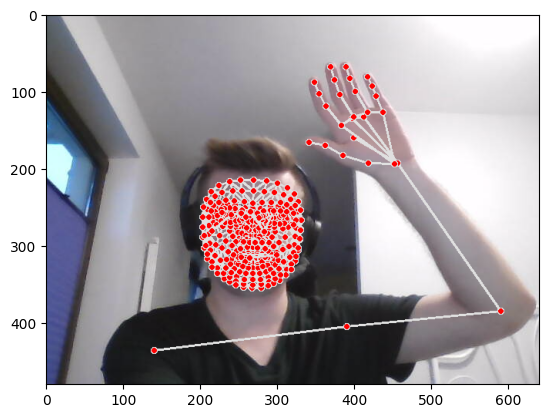

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [21]:
len(results.left_hand_landmarks.landmark)

21

In [22]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 



In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.44369325,  0.58761132, -0.94085705, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
468*3+33*4+21*3+21*3

1662

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 0.44369325,  0.58761132, -0.94085705, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [32]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [33]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [31]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [37]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(90, 30, 1662)

In [39]:
np.array(labels).shape

(90,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(90, 30, 1662)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [51]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [52]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)]

In [101]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 73ms/step - loss: 1.7054 - categorical_accuracy: 0.4118
Epoch 2/2000
3/3 [==============================] - 0s 72ms/step - loss: 6.5409 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.5818 - categorical_accuracy: 0.2706
Epoch 4/2000
3/3 [==============================] - 0s 71ms/step - loss: 31.2297 - categorical_accuracy: 0.2588
Epoch 5/2000
3/3 [==============================] - 0s 68ms/step - loss: 36.5801 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 67ms/step - loss: 11.7829 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 70ms/step - loss: 9.1712 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 69ms/step - loss: 15.7631 - categorical_accuracy: 0.3765
Epoch 9/2000
3/3 [==============================] - 0s 76ms/step - loss: 23.1253 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 77ms/step - loss: 1.7505 - categorical_accuracy: 0.4588
Epoch 146/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.3522 - categorical_accuracy: 0.4471
Epoch 147/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.1252 - categorical_accuracy: 0.3529
Epoch 148/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.9612 - categorical_accuracy: 0.4941
Epoch 149/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.5391 - categorical_accuracy: 0.3647
Epoch 150/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.5318 - categorical_accuracy: 0.3647
Epoch 151/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.3671 - categorical_accuracy: 0.3059
Epoch 152/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.5428 - categorical_accuracy: 0.3647
Epoch 153/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.1459 - categorical_accuracy: 0.329

3/3 [==============================] - 0s 77ms/step - loss: 0.8362 - categorical_accuracy: 0.5765
Epoch 290/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.7395 - categorical_accuracy: 0.6588
Epoch 291/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.8017 - categorical_accuracy: 0.6353
Epoch 292/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0051 - categorical_accuracy: 0.5176
Epoch 293/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0091 - categorical_accuracy: 0.5412
Epoch 294/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.9636 - categorical_accuracy: 0.6235
Epoch 295/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.4387 - categorical_accuracy: 0.3647
Epoch 296/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.2840 - categorical_accuracy: 0.4941
Epoch 297/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.2117 - categorical_accuracy: 0.447

3/3 [==============================] - 0s 81ms/step - loss: 1.0833 - categorical_accuracy: 0.5529
Epoch 434/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.2130 - categorical_accuracy: 0.6235
Epoch 435/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9368 - categorical_accuracy: 0.6588
Epoch 436/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2876 - categorical_accuracy: 0.5294
Epoch 437/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0075 - categorical_accuracy: 0.6235
Epoch 438/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8314 - categorical_accuracy: 0.6353
Epoch 439/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.7920 - categorical_accuracy: 0.6706
Epoch 440/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4576 - categorical_accuracy: 0.4706
Epoch 441/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.6614 - categorical_accuracy: 0.435

3/3 [==============================] - 0s 75ms/step - loss: 0.1949 - categorical_accuracy: 0.9412
Epoch 578/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.2000 - categorical_accuracy: 0.9529
Epoch 579/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1842 - categorical_accuracy: 0.9647
Epoch 580/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2050 - categorical_accuracy: 0.9412
Epoch 581/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1979 - categorical_accuracy: 0.9529
Epoch 582/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1796 - categorical_accuracy: 0.9647
Epoch 583/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1896 - categorical_accuracy: 0.9529
Epoch 584/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.1834 - categorical_accuracy: 0.9647
Epoch 585/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2246 - categorical_accuracy: 0.917

3/3 [==============================] - 0s 75ms/step - loss: 1.0647 - categorical_accuracy: 0.7294
Epoch 722/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.6278 - categorical_accuracy: 0.7059
Epoch 723/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.6936 - categorical_accuracy: 0.7765
Epoch 724/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0647 - categorical_accuracy: 0.7647
Epoch 725/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0100 - categorical_accuracy: 0.7412
Epoch 726/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.9577 - categorical_accuracy: 0.7294
Epoch 727/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.7766 - categorical_accuracy: 0.6941
Epoch 728/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.5695 - categorical_accuracy: 0.7882
Epoch 729/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4816 - categorical_accuracy: 0.905

3/3 [==============================] - 0s 74ms/step - loss: 0.2266 - categorical_accuracy: 0.9176
Epoch 866/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.2315 - categorical_accuracy: 0.9647
Epoch 867/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2400 - categorical_accuracy: 0.9647
Epoch 868/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1643 - categorical_accuracy: 0.9765
Epoch 869/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1601 - categorical_accuracy: 0.9765
Epoch 870/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1752 - categorical_accuracy: 0.9765
Epoch 871/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1680 - categorical_accuracy: 0.9765
Epoch 872/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1800 - categorical_accuracy: 0.9647
Epoch 873/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.1726 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 80ms/step - loss: 1.1835 - categorical_accuracy: 0.3294
Epoch 1010/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1744 - categorical_accuracy: 0.4118
Epoch 1011/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.3316 - categorical_accuracy: 0.3529
Epoch 1012/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.1807 - categorical_accuracy: 0.3412
Epoch 1013/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.1951 - categorical_accuracy: 0.2588
Epoch 1014/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1230 - categorical_accuracy: 0.3765
Epoch 1015/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.2621 - categorical_accuracy: 0.3529
Epoch 1016/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1977 - categorical_accuracy: 0.3529
Epoch 1017/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2024 - categorical_accurac

3/3 [==============================] - 0s 75ms/step - loss: 0.9431 - categorical_accuracy: 0.6471
Epoch 1082/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.9079 - categorical_accuracy: 0.5765
Epoch 1083/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8928 - categorical_accuracy: 0.6824
Epoch 1084/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9946 - categorical_accuracy: 0.6824
Epoch 1085/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.8642 - categorical_accuracy: 0.6706
Epoch 1086/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0489 - categorical_accuracy: 0.6118
Epoch 1087/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9548 - categorical_accuracy: 0.5647
Epoch 1088/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.7126 - categorical_accuracy: 0.6471
Epoch 1089/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.5677 - categorical_accurac

3/3 [==============================] - 0s 76ms/step - loss: 0.6718 - categorical_accuracy: 0.7647
Epoch 1154/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.6137 - categorical_accuracy: 0.8118
Epoch 1155/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.5465 - categorical_accuracy: 0.8471
Epoch 1156/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4162 - categorical_accuracy: 0.8941
Epoch 1157/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.4932 - categorical_accuracy: 0.8235
Epoch 1158/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.5528 - categorical_accuracy: 0.6941
Epoch 1159/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.5391 - categorical_accuracy: 0.8000
Epoch 1160/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.6105 - categorical_accuracy: 0.7412
Epoch 1161/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.3924 - categorical_accurac

Epoch 1225/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3785 - categorical_accuracy: 0.8588
Epoch 1226/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.4830 - categorical_accuracy: 0.8353
Epoch 1227/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4924 - categorical_accuracy: 0.8000
Epoch 1228/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4149 - categorical_accuracy: 0.8706
Epoch 1229/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4107 - categorical_accuracy: 0.8118
Epoch 1230/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4164 - categorical_accuracy: 0.8588
Epoch 1231/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5003 - categorical_accuracy: 0.7882
Epoch 1232/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5401 - categorical_accuracy: 0.8235
Epoch 1233/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6236 - ca

3/3 [==============================] - 0s 99ms/step - loss: 0.0864 - categorical_accuracy: 0.9765
Epoch 1368/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0836 - categorical_accuracy: 0.9882
Epoch 1369/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0680 - categorical_accuracy: 0.9765
Epoch 1370/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.1015 - categorical_accuracy: 0.9647
Epoch 1371/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1617 - categorical_accuracy: 0.9294
Epoch 1372/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0607 - categorical_accuracy: 0.9882
Epoch 1373/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0932 - categorical_accuracy: 0.9647
Epoch 1374/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0945 - categorical_accuracy: 0.9647
Epoch 1375/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0890 - categorical_accurac

Epoch 1439/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.3206 - categorical_accuracy: 0.8588
Epoch 1440/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2268 - categorical_accuracy: 0.9765
Epoch 1441/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.2289 - categorical_accuracy: 0.9294
Epoch 1442/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1697 - categorical_accuracy: 0.9765
Epoch 1443/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.1699 - categorical_accuracy: 0.9294
Epoch 1444/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1709 - categorical_accuracy: 0.9647
Epoch 1445/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.1290 - categorical_accuracy: 0.9647
Epoch 1446/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2043 - categorical_accuracy: 0.8941
Epoch 1447/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1956 - ca

Epoch 1582/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0605 - categorical_accuracy: 0.9882
Epoch 1583/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0438 - categorical_accuracy: 0.9882
Epoch 1584/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0367 - categorical_accuracy: 0.9882
Epoch 1585/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0673 - categorical_accuracy: 0.9765
Epoch 1586/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0569 - categorical_accuracy: 0.9882
Epoch 1587/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0385 - categorical_accuracy: 0.9882
Epoch 1588/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0484 - categorical_accuracy: 0.9882
Epoch 1589/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0373 - categorical_accuracy: 0.9882
Epoch 1590/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0339 - 

3/3 [==============================] - 0s 99ms/step - loss: 0.0421 - categorical_accuracy: 0.9882
Epoch 1725/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0877 - categorical_accuracy: 0.9765
Epoch 1726/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0491 - categorical_accuracy: 0.9882
Epoch 1727/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0488 - categorical_accuracy: 0.9765
Epoch 1728/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.1096 - categorical_accuracy: 0.9647
Epoch 1729/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0900 - categorical_accuracy: 0.9765
Epoch 1730/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0345 - categorical_accuracy: 0.9882
Epoch 1731/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.6568 - categorical_accuracy: 0.8235
Epoch 1732/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.6480 - categorical_a

Epoch 1867/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0788 - categorical_accuracy: 0.9882
Epoch 1868/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1018 - categorical_accuracy: 0.9882
Epoch 1869/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1392 - categorical_accuracy: 0.9647
Epoch 1870/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1068 - categorical_accuracy: 0.9765
Epoch 1871/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.2924 - categorical_accuracy: 0.9176
Epoch 1872/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.7383 - categorical_accuracy: 0.8706
Epoch 1873/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.5672 - categorical_accuracy: 0.6941
Epoch 1874/2000
3/3 [==============================] - 0s 99ms/step - loss: 4.7430 - categorical_accuracy: 0.6235
Epoch 1875/2000
3/3 [==============================] - 0s 101ms/step - loss: 6.3483 

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [ ]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[4])]

'hello'

In [46]:
actions[np.argmax(y_test[4])]

NameError: name 'y_test' is not defined

# 9. Save Weights

In [49]:
model.save('action.h5')

In [72]:
del model

In [53]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [54]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [55]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [108]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [109]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [110]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [56]:

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [114]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [115]:
len(sequence)

TypeError: object of type 'int' has no len()

In [117]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [118]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [119]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [58]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'media

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'media

1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 17ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.pyth

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==========

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))